In [1]:
# !pip install openpyxl
# !pip install cartopy
# !pip install folium
# !pip install plotly
# !pip install nbformat
# !pip install nbformat --upgrade
# print(nbformat.__version__)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import folium
import plotly.express as px
import nbformat

In [3]:
df = pd.read_excel("./data/Pittsburgh_AMS_Mobile_2016_2017.xlsx")

In [4]:
df.shape

(16392, 47)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16392 entries, 0 to 16391
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   OBJECTID           16392 non-null  int64         
 1   datetime           16392 non-null  datetime64[ns]
 2   run_index          16392 non-null  int64         
 3   Longitude          16392 non-null  float64       
 4   Latitude           16392 non-null  float64       
 5   Elevation          16089 non-null  float64       
 6   hour               16392 non-null  int64         
 7   CO2                13287 non-null  float64       
 8   CO                 13377 non-null  float64       
 9   NO                 13377 non-null  float64       
 10  NO2                13377 non-null  float64       
 11  NOx                13377 non-null  float64       
 12  matlab_date        16392 non-null  int64         
 13  month              16392 non-null  int64         
 14  PageNa

In [6]:
# Drop rows with missing NO2 since that is our target variable
df_NO2 = df.dropna(subset=['NO2'])

In [7]:
df_NO2.shape

(13377, 47)

In [8]:
df_NO2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13377 entries, 0 to 16377
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   OBJECTID           13377 non-null  int64         
 1   datetime           13377 non-null  datetime64[ns]
 2   run_index          13377 non-null  int64         
 3   Longitude          13377 non-null  float64       
 4   Latitude           13377 non-null  float64       
 5   Elevation          13074 non-null  float64       
 6   hour               13377 non-null  int64         
 7   CO2                13287 non-null  float64       
 8   CO                 13377 non-null  float64       
 9   NO                 13377 non-null  float64       
 10  NO2                13377 non-null  float64       
 11  NOx                13377 non-null  float64       
 12  matlab_date        13377 non-null  int64         
 13  month              13377 non-null  int64         
 14  PageName   

### datetime eda

In [9]:
# Check if there is duplicate datetime - no duplicate
datetime_duplicates = df_NO2[df_NO2.duplicated(subset=['datetime'], keep=False)]
datetime_duplicates

,OBJECTID,datetime,run_index,Longitude,Latitude,Elevation,hour,CO2,CO,NO,...,NH4RB,NH4Local,BC,BCRB,BCLocal,weight,site,period,season,type


In [10]:
# Splite the datetime into date and time, and extract year from date, count the number of records for each year
df_NO2["date"] = df_NO2["datetime"].dt.date
df_NO2["time"] = df_NO2["datetime"].dt.time
df_NO2["year"] = df_NO2["datetime"].dt.year

/var/folders/jt/9jtp_3t15h70m1pgcfrm_h900000gn/T/ipykernel_67356/1843397027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NO2["date"] = df_NO2["datetime"].dt.date
/var/folders/jt/9jtp_3t15h70m1pgcfrm_h900000gn/T/ipykernel_67356/1843397027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NO2["time"] = df_NO2["datetime"].dt.time
/var/folders/jt/9jtp_3t15h70m1pgcfrm_h900000gn/T/ipykernel_67356/1843397027.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [11]:
df_NO2["year"].value_counts()

year
2017    8255
2016    5122
Name: count, dtype: int64

In [12]:
df_NO2.groupby(["year", "month"]).size()

year  month
2016  8        1144
      9        1254
      11       2724
2017  1        2664
      2        5591
dtype: int64

### Location eda

In [13]:
# Check if there is duplicate location - there are duplicates
location_duplicates = df_NO2[df_NO2.duplicated(subset=["Longitude", "Latitude"], keep=False)]
location_duplicates.groupby(["Longitude", "Latitude"]).size()

Longitude   Latitude 
-80.174872  40.366092    3
-80.171097  40.374954    3
-80.171014  40.375293    2
-80.171012  40.375292    8
-80.164268  40.379745    2
                        ..
-79.927246  40.462968    2
            40.462970    2
-79.920841  40.475663    2
-79.917734  40.478751    2
-79.885895  40.539102    4
Length: 151, dtype: int64

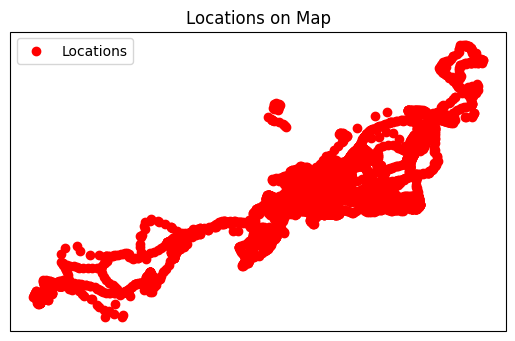

In [14]:
# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Plot points on the map
ax.scatter(df_NO2["Longitude"], df_NO2["Latitude"], color='red', marker='o', label='Locations')

# Add additional map features (e.g., coastlines)
ax.coastlines()

# Add labels and legend
ax.set_title('Locations on Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()

# Display the map
plt.show()

In [21]:
mapbox_api_token = 'pk.eyJ1IjoibWFyY2lhYWFtYSIsImEiOiJjbG9vbW05ZDIwMWhiMmtvZG1ldG55cnJ5In0.8vFy9eh9od6Su_RMcCs4IQ'

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df_NO2, 
                        lat="Latitude", 
                        lon="Longitude", 
                        color_continuous_scale=color_scale,
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [23]:
BBox = (df_NO2.Longitude.min(), df_NO2.Longitude.max(),      
         df_NO2.Latitude.min(), df_NO2.Latitude.max())
print(BBox)

(-80.17995679, -79.8753362, 40.35625813, 40.54018586)


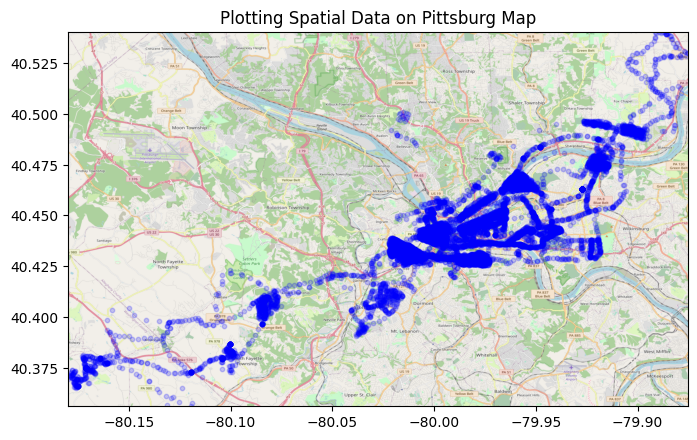

In [26]:
pittsburg_map = plt.imread('map.png')

fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df_NO2.Longitude, df_NO2.Latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Pittsburg Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(pittsburg_map, zorder=0, extent = BBox, aspect= 'equal')